## Project Team ID -- PTID-CDS-DEC-23-1713A

## Project ID -- PRCP-1020-HousePricePred 

## Project Name --  House Price Prediction - Advanced Regression

## Team Member Names --

* Rajeek Akthar
* Huzaf Nadaf
* Vishnu Bala Guru M
* Rajesh Devaguptapu

# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make  customers  buy the product.


# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
original = data.copy()

# Domain Analysis

### 1. Property Characteristics:

- MSSubClass: Defines the type of dwelling involved in the sale.
- MSZoning: Specifies the general zoning classification of the property.
- LotFrontage: Represents the linear feet of street connected to the property.
- LotArea: Indicates the size of the lot in square feet.
- Street: Describes the type of road access to the property.
- Alley: Specifies the type of alley access to the property.
- LotShape: Defines the general shape of the property.
- LandContour: Represents the flatness of the property.
- Utilities: Describes the type of utilities available.
### 2. Location and Proximity:
- LotConfig: Specifies the lot configuration.
- LandSlope: Indicates the slope of the property.
- Neighborhood: Represents physical locations within Ames city limits.
- Condition1, Condition2: Describe the proximity to main roads or railroads.

### 3. Building Characteristics:
- BldgType: Describes the type of dwelling (e.g., single-family, duplex).
- HouseStyle: Specifies the style of the dwelling.
- YearBuilt: Represents the original construction date.
- YearRemodAdd: Indicates the remodel date.
- RoofStyle: Describes the type of roof.
- RoofMatl: Represents the material used for roofing.
- Exterior1st, Exterior2nd: Describe the exterior covering on the house.
- MasVnrType: Specifies the type of masonry veneer.
- MasVnrArea: Indicates the masonry veneer area in square feet.
- ExterQual, ExterCond: Represent the quality and condition of the exterior material.
- Foundation: Describes the type of foundation.

### 4. Basement Characteristics:
- BsmtQual, BsmtCond: Describe the height and general condition of the basement.
- BsmtExposure: Indicates whether the basement has walkout or garden-level walls.
- BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2: Describe the quality and square footage of the basement finished areas.
- BsmtUnfSF: Represents the unfinished square feet of the basement.
- TotalBsmtSF: Represents the total square feet of the basement area.

### 5. Interior Features:
- Various columns like Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, etc., describe features related to the interior of the property.

### 6. Bathroom and Bedroom Features:
- Columns such as FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd provide information about the number and quality of bathrooms, bedrooms, and kitchens.

### 7. Functional and Fireplace Features:
- Functional: Represents the home functionality rating.
- Fireplaces, FireplaceQu: Indicate the number of fireplaces and their quality.

### 8. Garage Features:
- GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: Describe features related to the garage.

### 9. Driveway and Exterior Features:
- PavedDrive: Describes the type of paved driveway.
- Columns such as WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch provide information about various porch and deck features.

### 10. Pool and Fence Features:
- PoolArea, PoolQC: Describe pool-related features.
- Fence: Describes the quality of the fence.

### 11. Miscellaneous and Sale Information:
- MiscFeature, MiscVal: Indicate miscellaneous features not covered in other categories and their values.
- MoSold, YrSold: Represent the month and year of sale.
- SaleType: Describes the type of sale.
- SaleCondition: Represents the condition of sale.

###  12. SalePrice - Target Variable

# Task 1:-Prepare a complete data analysis report on the given data.


# Basic Checks

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.shape

(1460, 81)

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [10]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [11]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
for column in data.columns:
    unique = data[column].unique()
    print(f'\033[1m{column}:\033[0m\n{unique}\n{"=" * 75}')

Id:
[   1    2    3 ... 1458 1459 1460]
MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea:
[ 8450  9600 11250 ... 17217 13175  9717]
Street:
['Pave' 'Grvl']
Alley:
[nan 'Grvl' 'Pave']
LotShape:
['Reg' 'IR1' 'IR2' 'IR3']
LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:
['AllPub' 'NoSeWa']
LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSl

In [13]:
for column in data.drop(['Id','LotArea','MasVnrArea'],axis=1):
    value = data[column].value_counts()
    print(f'\033[1m{column}:\033[0m\n{value}\n{"-" * 75}')   

MSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
---------------------------------------------------------------------------
MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---------------------------------------------------------------------------
LotFrontage:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
---------------------------------------------------------------------------
Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64
---------------------------------------------------------------------------
Alley:
Grvl    50
Pave    41
Name: Alley, dtype: int64
----------------------------------------------------

In [14]:
num_data = data.select_dtypes(include=['int64','float64'])
len(num_data.columns)

38

In [15]:
cat_data = data.select_dtypes(include=['object'])
len(cat_data.columns)

43

### Insights
- In this dataset, there are 1460 rows and 81 columns.
- There are 43 columns are categorical data and 38 are numerical data.
- Some of the categorical data columns unique values are repeated.
- Some of the numerical data columns having corruption data.

# Exploratory Data Analysis

In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Univariate

In [18]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
cat_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

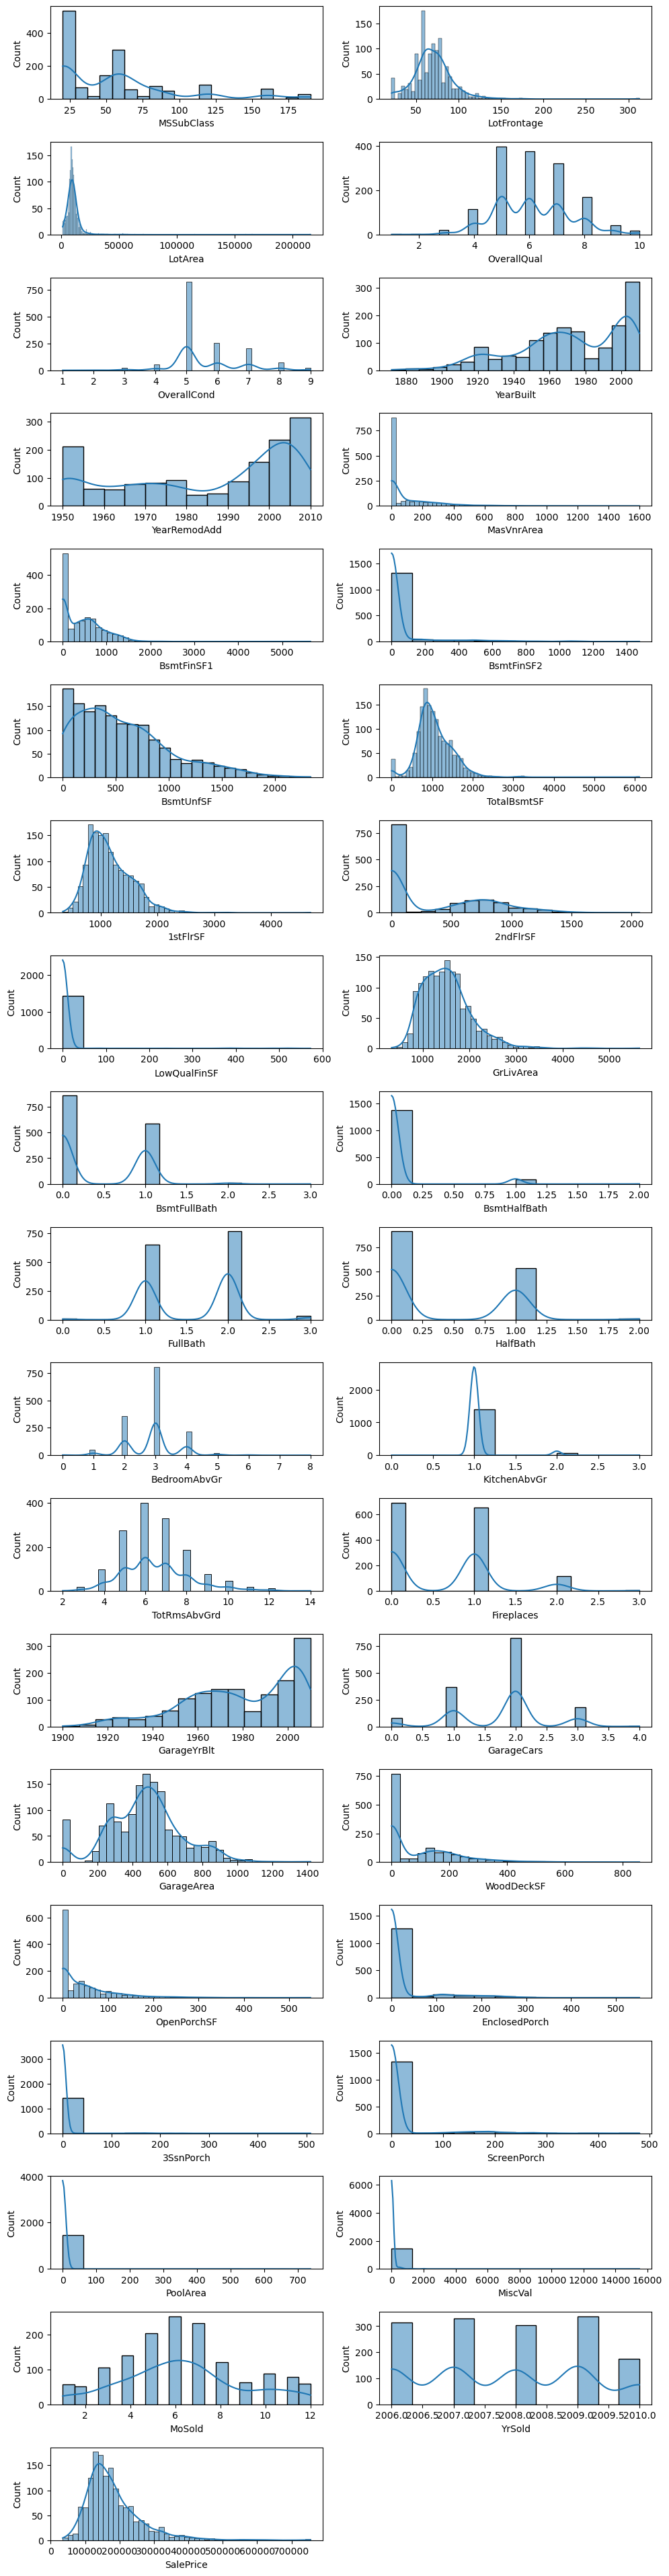

In [20]:
plt.figure(figsize=(10,40))
plot_number = 1

for column in num_data.drop('Id',axis=1):
    if plot_number<=40:
        plt.subplot(20,2,plot_number)
        sns.histplot(x=data[column],kde=True)
    plot_number+= 1
plt.tight_layout()

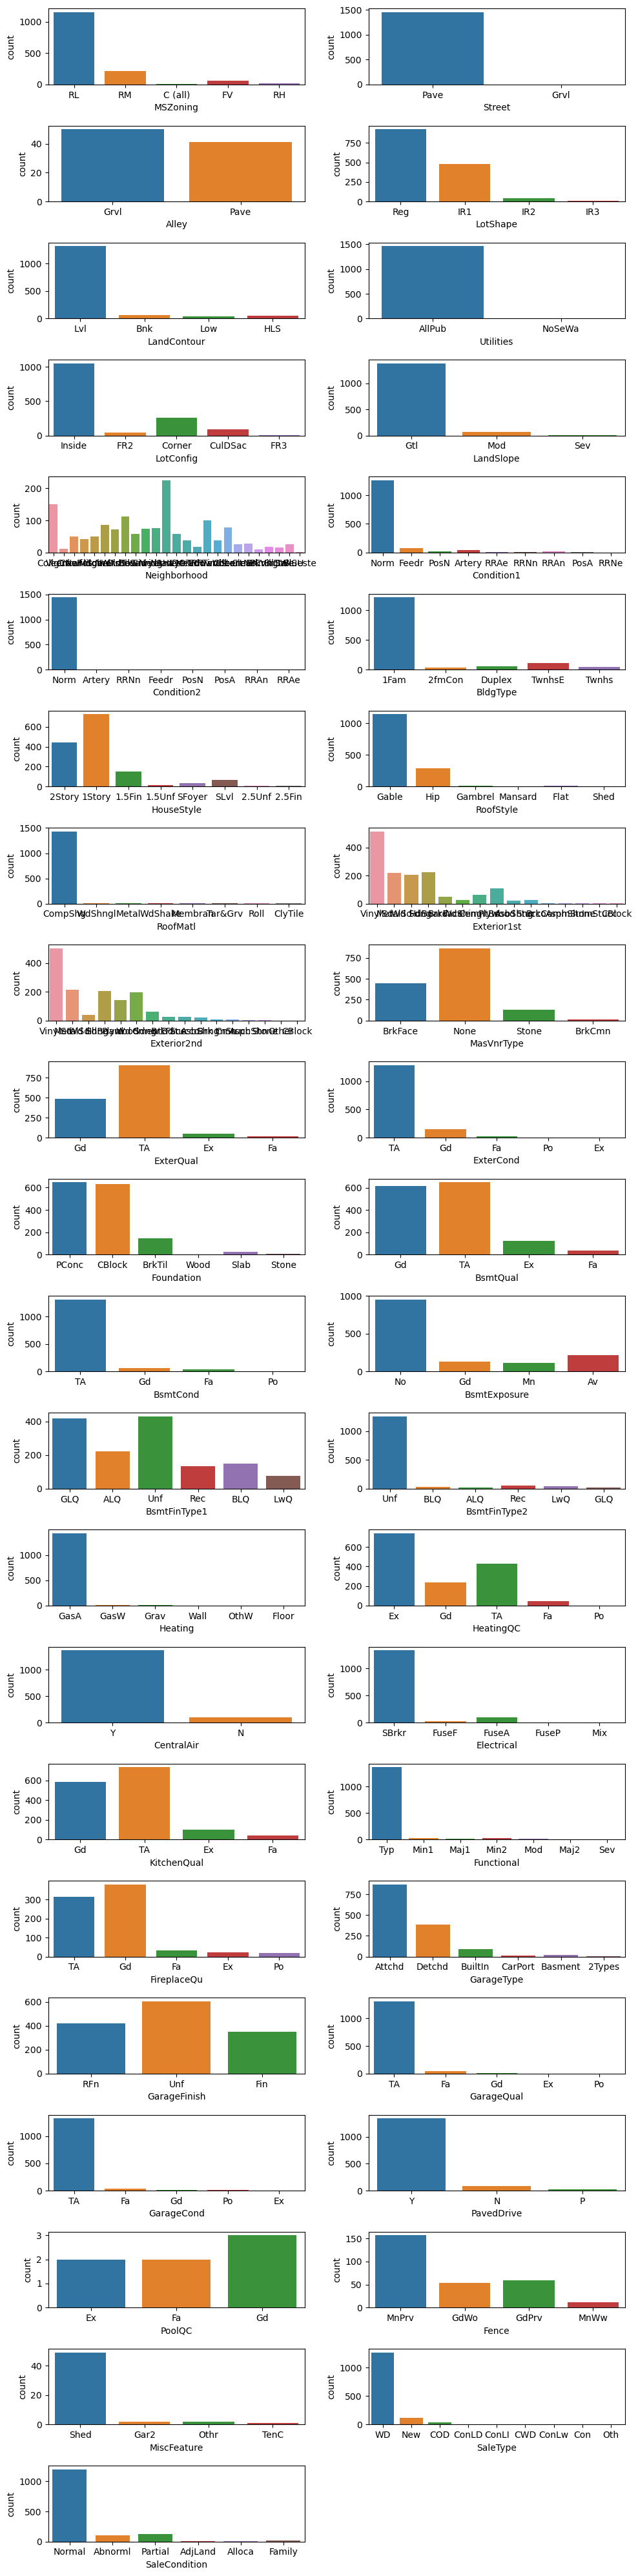

In [21]:
plt.figure(figsize=(10,40))
plot_number = 1

for column in cat_data:
    if plot_number<=45:
        plt.subplot(22,2,plot_number)
        sns.countplot(x=data[column])
    plot_number+= 1
plt.tight_layout()

<Axes: xlabel='SalePrice', ylabel='Count'>

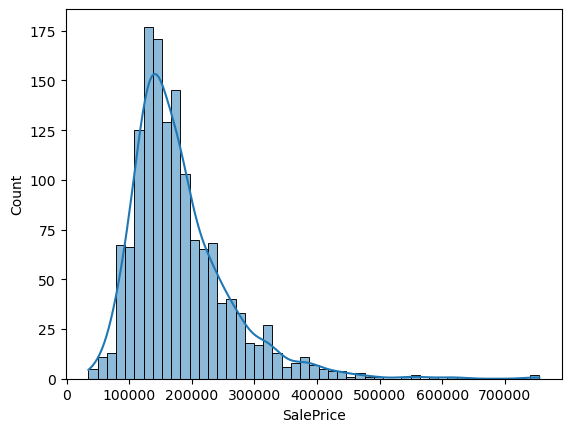

In [22]:
sns.histplot(x=data['SalePrice'],kde=True)

### Insights
- All numerical data columns is not normal distributions.
- All categorical data columns is not balanced.
- The target 'SalePrice' data is not normal distribution and it is right skewed
- Most of the values in target data 'SalePrice' range between 50000 to 450000

## Bivariate

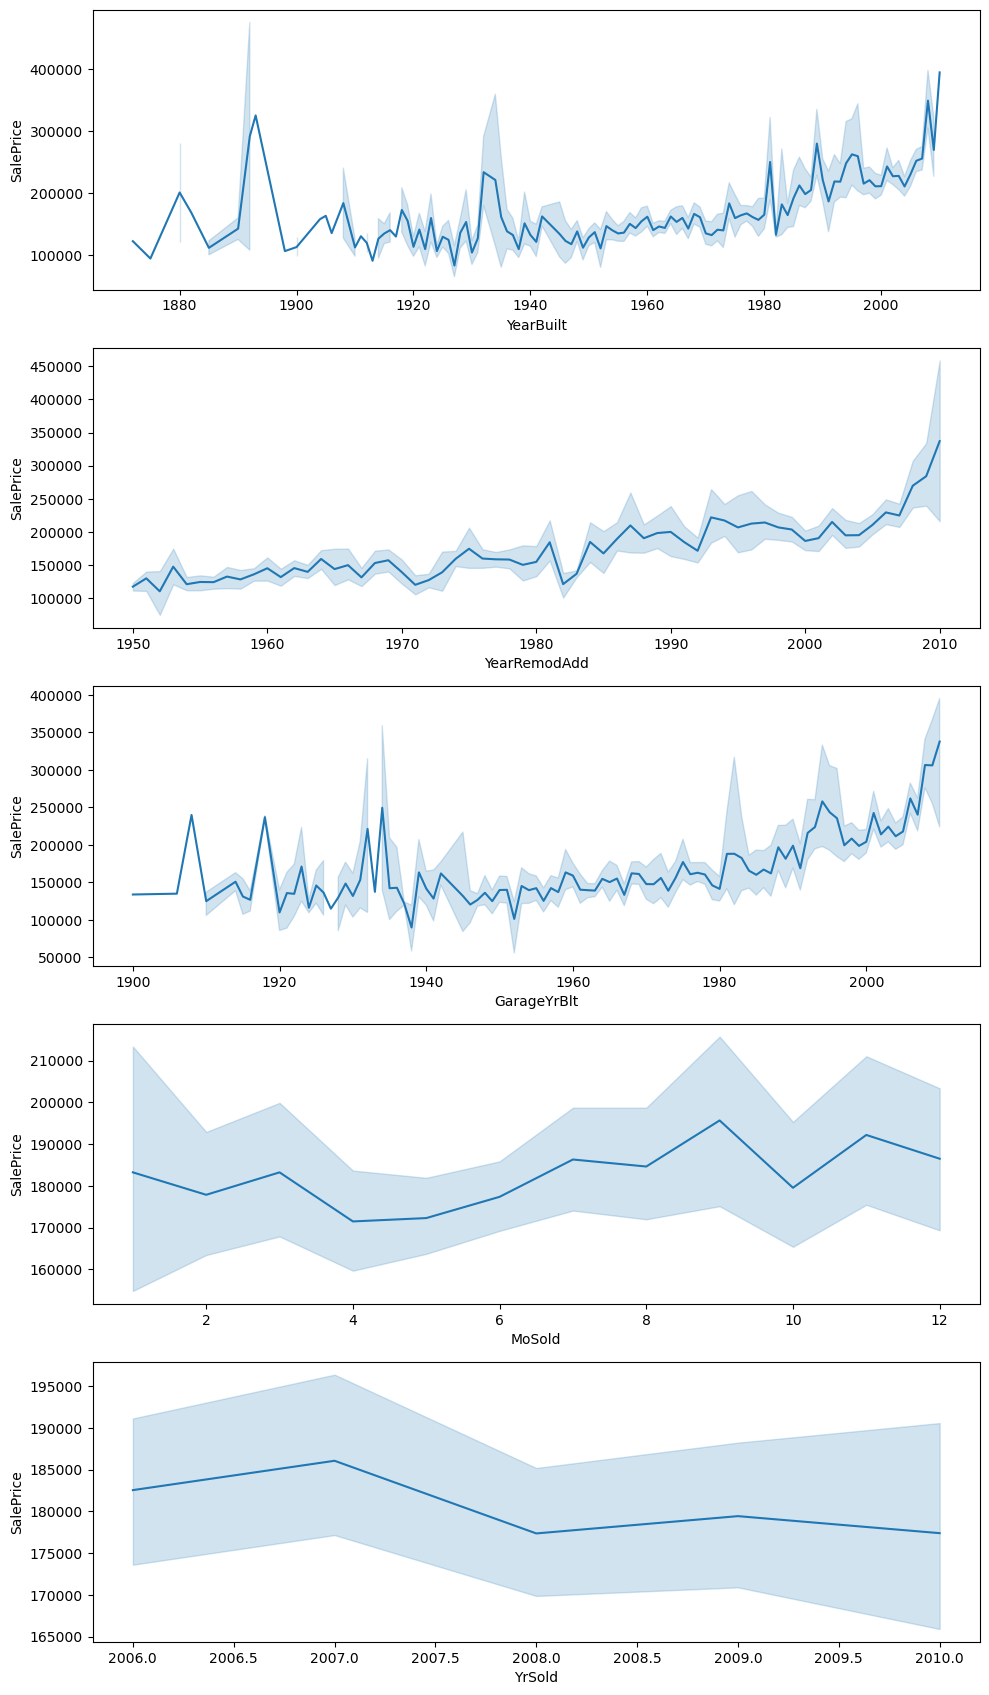

In [23]:
plt.figure(figsize=(10,20))
plot_number = 1

time = data[['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

for column in time:
    if plot_number<=6:
        plt.subplot(6,1,plot_number)
        sns.lineplot(x=data[column],y=data['SalePrice'])
    plot_number+= 1
plt.tight_layout()

### Insights 
- The house which the year built after 1980, the SalePrice is gradually increases
- The garage which the year built after 1980, the SalePrice is gradually increases
- Every house are sold in between 2006 and 2010

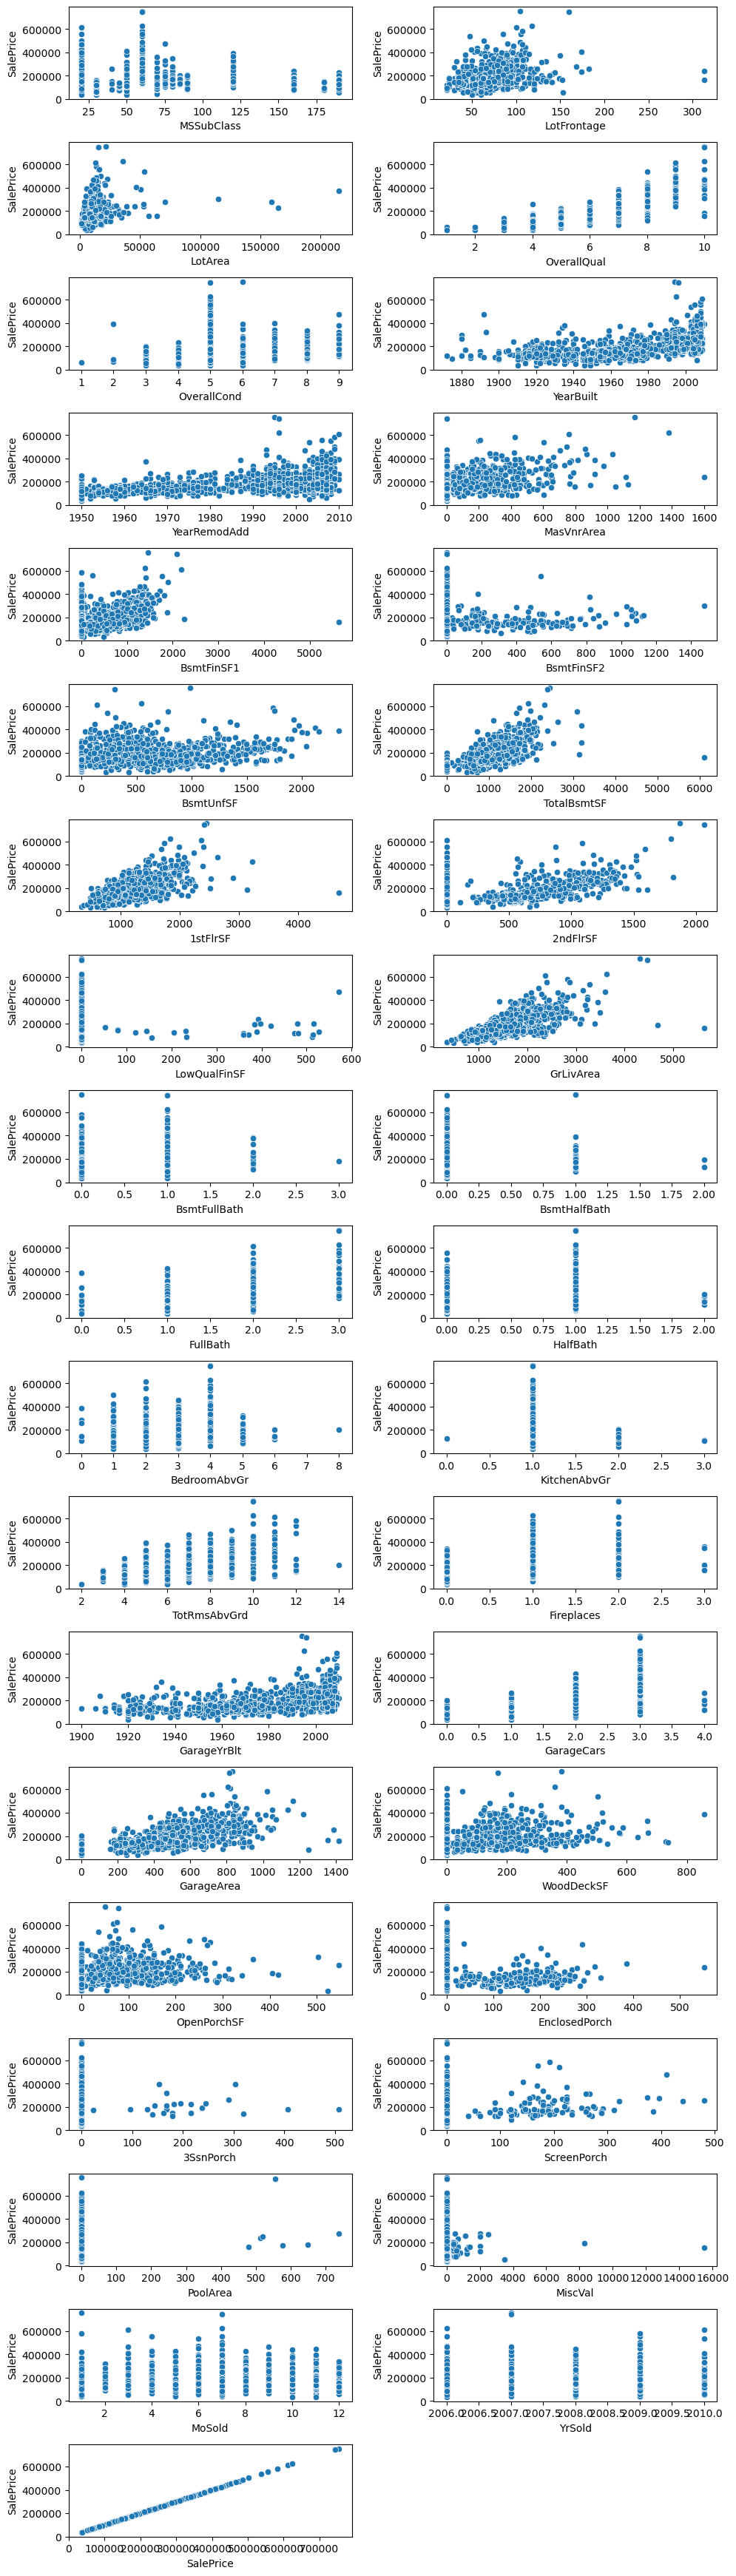

In [24]:
plt.figure(figsize=(10,40))
plot_number = 1

for column in num_data.drop('Id',axis=1):
    if plot_number<=44:
        plt.subplot(22,2,plot_number)
        sns.scatterplot(x=data[column],y=data['SalePrice'])
    plot_number+= 1
plt.tight_layout()

### Insights
- Most of the values in 'LotArea' is less than 50000 
- Most of the values in 'LotFrontage' is less than 150
- Most of the values in 'BsmtFinSF1' is less than 2000

## Multivariate

In [25]:
# sns.pairplot(data=num_data)

## Dropping irrelevant columns

In [26]:
# 'Street','Alley','Utilities','Condition2','RoofMatl','Exterior2nd','BsmtFinType2','LowQualFinSF','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','GarageCond','ScreenPorch','3SsnPorch']

In [27]:
data['EnclosedPorch'] = data['EnclosedPorch'] + data['ScreenPorch'] + data['3SsnPorch']

In [28]:
d = ['Id','Street','Utilities','Condition2','RoofMatl','Exterior2nd',
          'BsmtFinType2','LowQualFinSF','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
          'GarageCond','ScreenPorch','3SsnPorch','MiscVal','PoolArea']
data.drop(d,axis=1,inplace=True)

### Insights 
- Dropping the columns which the data values are corrupted and having the same unique values

# Data Preprocessing

## Missing

In [29]:
cat_data = data.select_dtypes(include=['object'])
len(cat_data.columns)

36

In [30]:
pd.set_option('display.max_rows',None)

In [31]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
Exterior1st         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces

In [32]:
data.shape

(1460, 65)

In [33]:
(data.isnull().sum()) / len(data) * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
2ndFlrSF          0.000000
G

### Insights 
- Drop MiscFeature, PoolQC, Fence, Alley columns having more missing values
- Missing values will be handled are replaced with median for numerical data columns
- Missing values will be handled are replaced with mode for categorical data columns

In [34]:
data.drop(['MiscFeature','PoolQC','Alley','Fence'],axis=1,inplace=True)

In [35]:
num_data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [36]:
data.loc[data['LotFrontage'].isnull(),'LotFrontage'] = data['LotFrontage'].median()
data.loc[data['MasVnrArea'].isnull(),'MasVnrArea'] = data['MasVnrArea'].median()
data.loc[data['GarageYrBlt'].isnull(),'GarageYrBlt'] = data['GarageYrBlt'].median()

In [37]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
MasVnrType         8
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt  

In [38]:
cat_data.isnull().sum()

MSZoning            0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [39]:
cat_data = data.select_dtypes(include=['object'])

In [40]:
for column in cat_data:
    data.loc[data[column].isnull(),column] = data[column].mode()[0]

In [41]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
PavedDrive  

## Outliers

In [42]:
pd.reset_option('display.max_rows',None)

In [43]:
num_data= data.select_dtypes(include=['int64','float64'])

In [44]:
len(num_data.columns)

29

In [45]:
plt.figure(figsize=(10,40))
plot_number = 1

for column in num_data:
    if plot_number<=40:
        plt.subplot(20,2,plot_number)
        sns.boxplot(x=data[column])
    plot_number+= 1
plt.tight_layout()

### Insights
- Outliers will be handled which is less than 5 %.
- Every numerical data columns are not normal distribution.
- To find the outliers we are using IQR and replace the value with median.

In [46]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [47]:
# IQR
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
IQR

MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
GrLivArea          647.25
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         39.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64

In [48]:
lower_limit = Q1 - 1.5 *IQR
lower_limit

MSSubClass        -55.000
LotFrontage        31.500
LotArea          1481.500
OverallQual         2.000
OverallCond         3.500
YearBuilt        1885.000
YearRemodAdd     1911.500
MasVnrArea       -246.375
BsmtFinSF1      -1068.375
BsmtUnfSF        -654.500
TotalBsmtSF        42.000
1stFlrSF          118.125
2ndFlrSF        -1092.000
GrLivArea         158.625
FullBath           -0.500
HalfBath           -1.500
BedroomAbvGr        0.500
KitchenAbvGr        1.000
TotRmsAbvGrd        2.000
Fireplaces         -1.500
GarageYrBlt      1903.500
GarageCars         -0.500
GarageArea        -27.750
WoodDeckSF       -252.000
OpenPorchSF      -102.000
EnclosedPorch       0.000
MoSold              0.500
YrSold           2004.000
SalePrice        3937.500
dtype: float64

In [49]:
upper_limit = Q3 + 1.5 *IQR
upper_limit

MSSubClass          145.000
LotFrontage         107.500
LotArea           17673.500
OverallQual          10.000
OverallCond           7.500
YearBuilt          2069.000
YearRemodAdd       2059.500
MasVnrArea          410.625
BsmtFinSF1         1780.625
BsmtUnfSF          1685.500
TotalBsmtSF        2052.000
1stFlrSF           2155.125
2ndFlrSF           1820.000
GrLivArea          2747.625
FullBath              3.500
HalfBath              2.500
BedroomAbvGr          4.500
KitchenAbvGr          1.000
TotRmsAbvGrd         10.000
Fireplaces            2.500
GarageYrBlt        2059.500
GarageCars            3.500
GarageArea          938.250
WoodDeckSF          420.000
OpenPorchSF         170.000
EnclosedPorch         0.000
MoSold               12.500
YrSold             2012.000
SalePrice        340037.500
dtype: float64

In [50]:
per_outliers = (num_data<lower_limit).sum() / len(data) * 100 + (num_data>upper_limit).sum() / len(data) * 100
per_outliers[per_outliers < 5]

LotArea         4.726027
OverallQual     0.136986
YearBuilt       0.479452
YearRemodAdd    0.000000
BsmtFinSF1      0.479452
BsmtUnfSF       1.986301
TotalBsmtSF     4.178082
1stFlrSF        1.369863
2ndFlrSF        0.136986
GrLivArea       2.123288
FullBath        0.000000
HalfBath        0.000000
BedroomAbvGr    2.397260
KitchenAbvGr    4.657534
TotRmsAbvGrd    2.054795
Fireplaces      0.342466
GarageYrBlt     0.068493
GarageCars      0.342466
GarageArea      1.438356
WoodDeckSF      2.191781
MoSold          0.000000
YrSold          0.000000
SalePrice       4.178082
dtype: float64

In [51]:
per_outliers[per_outliers < 5].index

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Handling Outliers

In [52]:
c = data[['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'MoSold', 'YrSold', 'SalePrice']]

In [53]:
len(c.columns)

23

In [54]:
for column in c:
    upper_limit_value = upper_limit[column]
    data.loc[data[column] > upper_limit_value, column] = data[column].median()

In [55]:
for column in c:
    lower_limit_value = lower_limit[column]
    data.loc[data[column] < lower_limit_value, column] = data[column].median()

In [56]:
num_data= data.select_dtypes(include=['int64','float64'])

In [57]:
per_outliers = (num_data<lower_limit).sum() / len(data) * 100 + (num_data>upper_limit).sum() / len(data) * 100
per_outliers[per_outliers < 5]

LotArea         0.0
OverallQual     0.0
YearBuilt       0.0
YearRemodAdd    0.0
BsmtFinSF1      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
1stFlrSF        0.0
2ndFlrSF        0.0
GrLivArea       0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
TotRmsAbvGrd    0.0
Fireplaces      0.0
GarageYrBlt     0.0
GarageCars      0.0
GarageArea      0.0
WoodDeckSF      0.0
MoSold          0.0
YrSold          0.0
SalePrice       0.0
dtype: float64

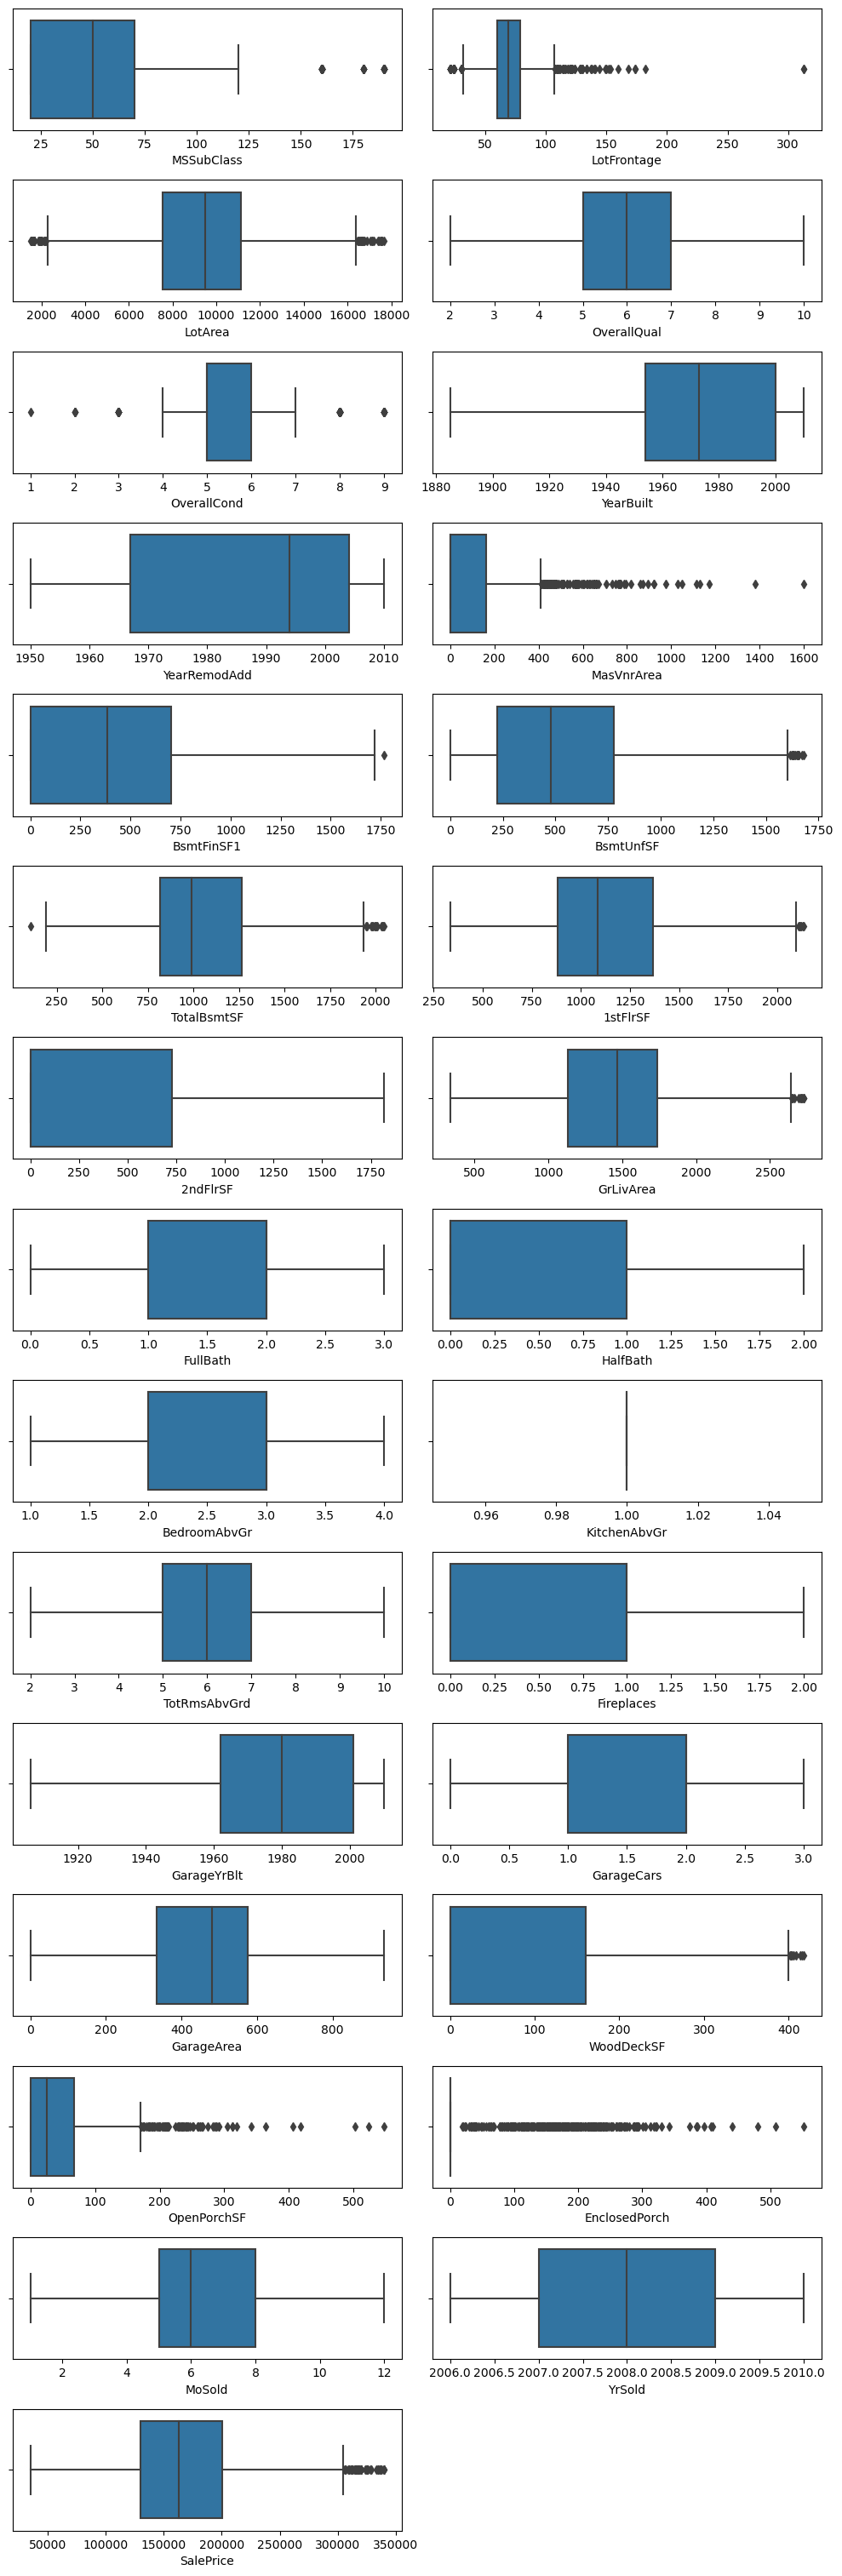

In [58]:
plt.figure(figsize=(10,40))
plot_number = 1

for column in num_data:
    if plot_number<=40:
        plt.subplot(20,2,plot_number)
        sns.boxplot(x=data[column])
    plot_number+= 1
plt.tight_layout()

### Insights
- Outliers are handled for the numerical column having only less than 5%

In [59]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0   8450.0      Reg         Lvl    Inside   
1          20       RL         80.0   9600.0      Reg         Lvl       FR2   
2          60       RL         68.0  11250.0      IR1         Lvl    Inside   
3          70       RL         60.0   9550.0      IR1         Lvl    Corner   
4          60       RL         84.0  14260.0      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st MasVnrType  \
0            5       2003          2003     Gable     VinylSd    BrkFace   
1            8       1976          1976     Gable     MetalSd       None   
2            5       2001          2002     Gable     VinylSd    BrkFace   
3            5       1915          1970     Gable     Wd Sdng       None   
4            5       2000          2000     Gable     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ       706.0      150.0        856.0    GasA        Ex   
1          ALQ       978.0      284.0       1262.0    GasA        Ex   
2          GLQ       486.0      434.0        920.0    GasA        Ex   
3          ALQ       216.0      540.0        756.0    GasA        Gd   
4          GLQ       655.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0          Y      SBrkr     856.0       854       1710         2         1   
1          Y      SBrkr    1262.0         0       1262         2         0   
2          Y      SBrkr     920.0       866       1786         2         1   
3          Y      SBrkr     961.0       756       1717         1         0   
4          Y      SBrkr    1145.0      1053       2198         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0          Gd     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA     Attchd       2001.0          RFn           2   
3           1          Gd     Detchd       1998.0          Unf           3   
4           1          TA     Attchd       2000.0          RFn           3   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         548         TA          Y           0           61              0   
1         460         TA          Y         298            0              0   
2         608         TA          Y           0           42              0   
3         642         TA          Y           0        

## Scaling

In [60]:
df = data.copy()

In [61]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0   8450.0      Reg         Lvl    Inside   
1          20       RL         80.0   9600.0      Reg         Lvl       FR2   
2          60       RL         68.0  11250.0      IR1         Lvl    Inside   
3          70       RL         60.0   9550.0      IR1         Lvl    Corner   
4          60       RL         84.0  14260.0      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st MasVnrType  \
0            5       2003          2003     Gable     VinylSd    BrkFace   
1            8       1976          1976     Gable     MetalSd       None   
2            5       2001          2002     Gable     VinylSd    BrkFace   
3            5       1915          1970     Gable     Wd Sdng       None   
4            5       2000          2000     Gable     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ       706.0      150.0        856.0    GasA        Ex   
1          ALQ       978.0      284.0       1262.0    GasA        Ex   
2          GLQ       486.0      434.0        920.0    GasA        Ex   
3          ALQ       216.0      540.0        756.0    GasA        Gd   
4          GLQ       655.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0          Y      SBrkr     856.0       854       1710         2         1   
1          Y      SBrkr    1262.0         0       1262         2         0   
2          Y      SBrkr     920.0       866       1786         2         1   
3          Y      SBrkr     961.0       756       1717         1         0   
4          Y      SBrkr    1145.0      1053       2198         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0          Gd     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA     Attchd       2001.0          RFn           2   
3           1          Gd     Detchd       1998.0          Unf           3   
4           1          TA     Attchd       2000.0          RFn           3   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         548         TA          Y           0           61              0   
1         460         TA          Y         298            0              0   
2         608         TA          Y           0           42              0   
3         642         TA          Y           0        

In [62]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [63]:
num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [64]:
s = df[['LotFrontage', 'LotArea','YearBuilt','YearRemodAdd' ,'MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea','GarageYrBlt', 'GarageArea', 'WoodDeckSF','EnclosedPorch', 'OpenPorchSF', 'YrSold', 'BsmtFinSF1','SalePrice']]

In [65]:
df[['LotFrontage', 'LotArea','YearBuilt','YearRemodAdd' ,'MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea','GarageYrBlt', 'GarageArea', 'WoodDeckSF','EnclosedPorch', 'OpenPorchSF', 'YrSold', 'BsmtFinSF1','SalePrice']] = scale.fit_transform(s)

In [66]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour LotConfig  \
0          60       RL     0.150685  0.430099      Reg         Lvl    Inside   
1          20       RL     0.202055  0.501174      Reg         Lvl       FR2   
2          60       RL     0.160959  0.603152      IR1         Lvl    Inside   
3          70       RL     0.133562  0.498084      IR1         Lvl    Corner   
4          60       RL     0.215753  0.789184      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st MasVnrType  \
0            5      0.944      0.883333     Gable     VinylSd    BrkFace   
1            8      0.728      0.433333     Gable     MetalSd       None   
2            5      0.928      0.866667     Gable     VinylSd    BrkFace   
3            5      0.240      0.333333     Gable     Wd Sdng       None   
4            5      0.920      0.833333     Gable     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     0.12250        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2     0.10125        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4     0.21875        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ    0.399547   0.089286     0.386914    GasA        Ex   
1          ALQ    0.553480   0.169048     0.596084    GasA        Ex   
2          GLQ    0.275042   0.258333     0.419887    GasA        Ex   
3          ALQ    0.122241   0.321429     0.335394    GasA        Gd   
4          GLQ    0.370685   0.291667     0.535806    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0          Y      SBrkr  0.289678  0.469747   0.574290         2         1   
1          Y      SBrkr  0.514983  0.000000   0.387312         2         0   
2          Y      SBrkr  0.325194  0.476348   0.606010         2         1   
3          Y      SBrkr  0.347947  0.415842   0.577212         1         0   
4          Y      SBrkr  0.450055  0.579208   0.777963         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0          Gd     Attchd     0.932692          RFn           2   
1           1          TA     Attchd     0.673077          RFn           2   
2           1          TA     Attchd     0.913462          RFn           2   
3           1          Gd     Detchd     0.884615          Unf           3   
4           1          TA     Attchd     0.903846          RFn           3   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0    0.585470         TA          Y    0.000000     0.111517       0.000000   
1    0.491453         TA          Y    0.712919     0.000000       0.000000   
2    0.649573         TA          Y    0.000000     0.076782       0.000000   
3    0.685897         TA          Y    0.000000  

## Encoding

In [67]:
cat_data= data.select_dtypes(include=['object'])

In [68]:
for column in cat_data:
    unique = data[column].unique()
    print(f'{column}:\n{unique}\n{"=" * 75}')

MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape:
['Reg' 'IR1' 'IR2' 'IR3']
LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:
['Gtl' 'Mod' 'Sev']
Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Exterior1st:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
MasVnrType:
['BrkFace' 'None' 'Stone' 'BrkCmn']
ExterQual:
['Gd' 'TA' 'Ex' 'Fa']
ExterCond:
['TA'

In [69]:
cat_data.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Label Encoding

In [70]:
df

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour  \
0             60       RL     0.150685  0.430099      Reg         Lvl   
1             20       RL     0.202055  0.501174      Reg         Lvl   
2             60       RL     0.160959  0.603152      IR1         Lvl   
3             70       RL     0.133562  0.498084      IR1         Lvl   
4             60       RL     0.215753  0.789184      IR1         Lvl   
...          ...      ...          ...       ...      ...         ...   
1455          60       RL     0.140411  0.397157      Reg         Lvl   
1456          20       RL     0.219178  0.722126      Reg         Lvl   
1457          70       RL     0.154110  0.466687      Reg         Lvl   
1458          20       RL     0.160959  0.508405      Reg         Lvl   
1459          20       RL     0.184932  0.522002      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0       Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1          FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2       Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3       Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4          FR2       Gtl      NoRidge       Norm     1Fam     2Story   
...        ...       ...          ...        ...      ...        ...   
1455    Inside       Gtl      Gilbert       Norm     1Fam     2Story   
1456    Inside       Gtl       NWAmes       Norm     1Fam     1Story   
1457    Inside       Gtl      Crawfor       Norm     1Fam     2Story   
1458    Inside       Gtl        NAmes       Norm     1Fam     1Story   
1459    Inside       Gtl      Edwards       Norm     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0               7            5      0.944      0.883333     Gable     VinylSd   
1               6            8      0.728      0.433333     Gable     MetalSd   
2               7            5      0.928      0.866667     Gable     VinylSd   
3               7            5      0.240      0.333333     Gable     Wd Sdng   
4               8            5      0.920      0.833333     Gable     VinylSd   
...           ...          ...        ...           ...       ...         ...   
1455            6            5      0.912      0.833333     Gable     VinylSd   
1456            6            6      0.744      0.633333     Gable     Plywood   
1457            7            9      0.448      0.933333     Gable     CemntBd   
1458            5            6      0.520      0.766667       Hip     MetalSd   
1459            5            6      0.640      0.250000     Gable     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace    0.122500        Gd        TA      PConc       Gd       TA   
1          None    0.000000        TA        TA     CBlock       Gd       TA   
2       BrkFace    0.101250        Gd        TA      PConc       Gd       TA   
3          None    0.000000        TA        TA     BrkTil       TA       Gd   
4       BrkFace    0.218750        Gd        TA      PConc       Gd       TA   
...         ...         ...       ...       ...        ...      ...      ...   
1455       None    0.000000        TA        TA      PConc       Gd       TA   
1456      Stone    0.074375        TA        TA     CBlock       Gd       TA   
1457       None    0.000000        Ex        Gd      Stone       TA       Gd   
1458       None    0.000000        TA        TA     CBlock       TA       TA   
1459       None    0.000000        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating  \
0              No          GLQ    0.399547   0.089286     0.386914    GasA   
1              Gd          ALQ    0.553480   0.169048     0.596084    GasA   
2              Mn          GLQ    0.275042   0.258333     0.419887    GasA   
3              No 

In [71]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour LotConfig  \
0          60       RL     0.150685  0.430099      Reg         Lvl    Inside   
1          20       RL     0.202055  0.501174      Reg         Lvl       FR2   
2          60       RL     0.160959  0.603152      IR1         Lvl    Inside   
3          70       RL     0.133562  0.498084      IR1         Lvl    Corner   
4          60       RL     0.215753  0.789184      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st MasVnrType  \
0            5      0.944      0.883333     Gable     VinylSd    BrkFace   
1            8      0.728      0.433333     Gable     MetalSd       None   
2            5      0.928      0.866667     Gable     VinylSd    BrkFace   
3            5      0.240      0.333333     Gable     Wd Sdng       None   
4            5      0.920      0.833333     Gable     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     0.12250        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2     0.10125        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4     0.21875        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ    0.399547   0.089286     0.386914    GasA        Ex   
1          ALQ    0.553480   0.169048     0.596084    GasA        Ex   
2          GLQ    0.275042   0.258333     0.419887    GasA        Ex   
3          ALQ    0.122241   0.321429     0.335394    GasA        Gd   
4          GLQ    0.370685   0.291667     0.535806    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0          Y      SBrkr  0.289678  0.469747   0.574290         2         1   
1          Y      SBrkr  0.514983  0.000000   0.387312         2         0   
2          Y      SBrkr  0.325194  0.476348   0.606010         2         1   
3          Y      SBrkr  0.347947  0.415842   0.577212         1         0   
4          Y      SBrkr  0.450055  0.579208   0.777963         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0          Gd     Attchd     0.932692          RFn           2   
1           1          TA     Attchd     0.673077          RFn           2   
2           1          TA     Attchd     0.913462          RFn           2   
3           1          Gd     Detchd     0.884615          Unf           3   
4           1          TA     Attchd     0.903846          RFn           3   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0    0.585470         TA          Y    0.000000     0.111517       0.000000   
1    0.491453         TA          Y    0.712919     0.000000       0.000000   
2    0.649573         TA          Y    0.000000     0.076782       0.000000   
3    0.685897         TA          Y    0.000000  

## One Hot Encoding

In [72]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour LotConfig  \
0          60       RL     0.150685  0.430099      Reg         Lvl    Inside   
1          20       RL     0.202055  0.501174      Reg         Lvl       FR2   
2          60       RL     0.160959  0.603152      IR1         Lvl    Inside   
3          70       RL     0.133562  0.498084      IR1         Lvl    Corner   
4          60       RL     0.215753  0.789184      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st MasVnrType  \
0            5      0.944      0.883333     Gable     VinylSd    BrkFace   
1            8      0.728      0.433333     Gable     MetalSd       None   
2            5      0.928      0.866667     Gable     VinylSd    BrkFace   
3            5      0.240      0.333333     Gable     Wd Sdng       None   
4            5      0.920      0.833333     Gable     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     0.12250        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2     0.10125        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4     0.21875        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          GLQ    0.399547   0.089286     0.386914    GasA        Ex   
1          ALQ    0.553480   0.169048     0.596084    GasA        Ex   
2          GLQ    0.275042   0.258333     0.419887    GasA        Ex   
3          ALQ    0.122241   0.321429     0.335394    GasA        Gd   
4          GLQ    0.370685   0.291667     0.535806    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0          Y      SBrkr  0.289678  0.469747   0.574290         2         1   
1          Y      SBrkr  0.514983  0.000000   0.387312         2         0   
2          Y      SBrkr  0.325194  0.476348   0.606010         2         1   
3          Y      SBrkr  0.347947  0.415842   0.577212         1         0   
4          Y      SBrkr  0.450055  0.579208   0.777963         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0          Gd     Attchd     0.932692          RFn           2   
1           1          TA     Attchd     0.673077          RFn           2   
2           1          TA     Attchd     0.913462          RFn           2   
3           1          Gd     Detchd     0.884615          Unf           3   
4           1          TA     Attchd     0.903846          RFn           3   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0    0.585470         TA          Y    0.000000     0.111517       0.000000   
1    0.491453         TA          Y    0.712919     0.000000       0.000000   
2    0.649573         TA          Y    0.000000     0.076782       0.000000   
3    0.685897         TA          Y    0.000000  

In [73]:
cat_data.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
for column in cat_data:
    df2 = pd.get_dummies(df[column],prefix= column,drop_first=True)
    df = pd.concat([df,df2],axis=1).drop(column,axis=1)

In [75]:
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     0.150685  0.430099            7            5      0.944   
1             20     0.202055  0.501174            6            8      0.728   
2             60     0.160959  0.603152            7            5      0.928   
3             70     0.133562  0.498084            7            5      0.240   
4             60     0.215753  0.789184            8            5      0.920   
...          ...          ...       ...          ...          ...        ...   
1455          60     0.140411  0.397157            6            5      0.912   
1456          20     0.219178  0.722126            6            6      0.744   
1457          70     0.154110  0.466687            7            9      0.448   
1458          20     0.160959  0.508405            5            6      0.520   
1459          20     0.184932  0.522002            5            6      0.640   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         0.883333    0.122500    0.399547   0.089286     0.386914  0.289678   
1         0.433333    0.000000    0.553480   0.169048     0.596084  0.514983   
2         0.866667    0.101250    0.275042   0.258333     0.419887  0.325194   
3         0.333333    0.000000    0.122241   0.321429     0.335394  0.347947   
4         0.833333    0.218750    0.370685   0.291667     0.535806  0.450055   
...            ...         ...         ...        ...          ...       ...   
1455      0.833333    0.000000    0.000000   0.567262     0.436888  0.343507   
1456      0.633333    0.074375    0.447085   0.350595     0.740340  0.965039   
1457      0.933333    0.000000    0.155631   0.522024     0.539413  0.473918   
1458      0.766667    0.000000    0.027731   0.000000     0.501288  0.412875   
1459      0.250000    0.000000    0.469723   0.080952     0.592993  0.511654   

      2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0     0.469747   0.574290         2         1             3             1   
1     0.000000   0.387312         2         0             3             1   
2     0.476348   0.606010         2         1             3             1   
3     0.415842   0.577212         1         0             3             1   
4     0.579208   0.777963         2         1             4             1   
...        ...        ...       ...       ...           ...           ...   
1455  0.381738   0.547997         2         1             3             1   
1456  0.000000   0.725793         2         0             3             1   
1457  0.633663   0.837229         2         0             4             1   
1458  0.000000   0.310518         1         0             2             1   
1459  0.000000   0.384808         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0     0.932692           2    0.585470   
1                6           1     0.673077           2    0.491453   
2                6           1     0.913462           2    0.649573   
3                7           1     0.884615           3    0.685897   
4                9           1     0.903846           3    0.893162   
...            ...         ...          ...         ...         ...   
1455             7           1     0.894231           2    0.491453   
1456             7           2     0.692308           2    0.534188   
1457             9           2     0.336538           1    0.269231   
1458             5           0     0.423077           1    0.256410   
1459             6           0     0.567308           1    0.294872   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  YrSold  SalePrice  \
0       0.000000     0.111517       0.000000       2    0.50   0.568994   
1       0.712919     0.000000       0.000000       5    0.25   0.480498   
2       0.000000     0.076782       0.000000       9    0.50   0.618158   
3     

# Feature Engineering

## Checking Correlation

In [76]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000    -0.356718 -0.433102     0.029164   
LotFrontage             -0.356718     1.000000  0.512149     0.234680   
LotArea                 -0.433102     0.512149  1.000000     0.234299   
OverallQual              0.029164     0.234680  0.234299     1.000000   
OverallCond             -0.059316    -0.053281 -0.020635    -0.108876   
...                           ...          ...       ...          ...   
SaleCondition_AdjLand    0.016241    -0.036570 -0.021503    -0.042334   
SaleCondition_Alloca     0.030002    -0.018040 -0.016520    -0.045831   
SaleCondition_Family     0.000983     0.016250  0.012157    -0.026345   
SaleCondition_Normal     0.024359    -0.074146 -0.027089    -0.142298   
SaleCondition_Partial   -0.051068     0.127293  0.078390     0.324823   

                       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
MSSubClass               -0.059316   0.032450      0.040581    0.023573   
LotFrontage              -0.053281   0.121823      0.083348    0.178469   
LotArea                  -0.020635   0.105490      0.074317    0.140625   
OverallQual              -0.108876   0.590293      0.547444    0.408250   
OverallCond               1.000000  -0.367428      0.073741   -0.125694   
...                            ...        ...           ...         ...   
SaleCondition_AdjLand    -0.038888  -0.047483     -0.040294   -0.011783   
SaleCondition_Alloca     -0.033444  -0.011742     -0.020727   -0.013748   
SaleCondition_Family     -0.023873  -0.038441     -0.048056   -0.009535   
SaleCondition_Normal      0.161642  -0.160606     -0.120577   -0.081539   
SaleCondition_Partial    -0.151659   0.347311      0.322837    0.162205   

                       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
MSSubClass              -0.067503  -0.121484    -0.255662 -0.247982  0.310261   
LotFrontage              0.111567   0.088239     0.259412  0.340631  0.055068   
LotArea                  0.174015   0.054740     0.330366  0.397363  0.088781   
OverallQual              0.199034   0.238450     0.447554  0.429405  0.279289   
OverallCond             -0.039369  -0.116997    -0.228555 -0.148286  0.029768   
...                           ...        ...          ...       ...       ...   
SaleCondition_AdjLand   -0.014752  -0.034542    -0.033738 -0.039113 -0.014339   
SaleCondition_Alloca     0.025261  -0.058896     0.005860  0.050538 -0.019852   
SaleCondition_Family     0.003706   0.010783     0.025379  0.031693 -0.026695   
SaleCondition_Normal     0.018858  -0.121109    -0.151130 -0.134630  0.037666   
SaleCondition_Partial   -0.004655   0.193943     0.241099  0.209490  0.006805   

                       GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
MSSubClass              0.073900  0.131608  0.177354     -0.082360   
LotFrontage             0.267317  0.180534  0.047222      0.258349   
LotArea                 0.365683  0.203050  0.096056      0.317938   
OverallQual             0.549942  0.546136  0.277210      0.130860   
OverallCond            -0.111005 -0.194149 -0.060769      0.021735   
...                          ...       ...       ...           ...   
SaleCondition_AdjLand  -0.042874 -0.006193 -0.013854      0.012440   
SaleCondition_Alloca    0.016592  0.016794  0.006119      0.032335   
SaleCondition_Family    0.001184 -0.003225 -0.042872      0.027970   
SaleCondition_Normal   -0.051084 -0.110040  0.011766      0.053100   
SaleCondition_Partial   0.138793  0.232767  0.054248     -0.052016   

                       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
MSSubClass                      NaN      0.010977   -0.044362     0.088913   
LotFrontage                     NaN      0.282483    0.210824     0.062202   
LotArea                         NaN      0.367361    0.294131     0.041725   
OverallQual                     NaN      0.406677    0.391704     0.521132   
OverallCond                     NaN     -

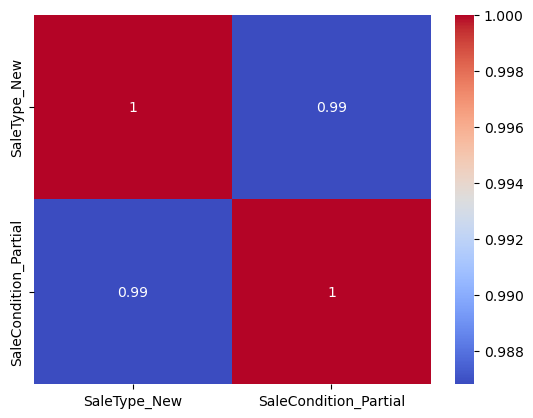

In [77]:
mask = df.corr() > 0.9 
highly_correlated = df.columns[mask.sum() > 1]

sns.heatmap(df[highly_correlated].corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.show()

### Insights
- KitchenAbvGr having only one unique value and dropping the column
- SaleType_New and SaleCondition_Partial are more correlated and dropping SaleType_New

In [78]:
df['KitchenAbvGr'].unique()

array([1], dtype=int64)

In [79]:
highly_correlated

Index(['SaleType_New', 'SaleCondition_Partial'], dtype='object')

In [80]:
df.drop(['KitchenAbvGr','SaleType_New'],axis=1,inplace=True)

In [81]:
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     0.150685  0.430099            7            5      0.944   
1             20     0.202055  0.501174            6            8      0.728   
2             60     0.160959  0.603152            7            5      0.928   
3             70     0.133562  0.498084            7            5      0.240   
4             60     0.215753  0.789184            8            5      0.920   
...          ...          ...       ...          ...          ...        ...   
1455          60     0.140411  0.397157            6            5      0.912   
1456          20     0.219178  0.722126            6            6      0.744   
1457          70     0.154110  0.466687            7            9      0.448   
1458          20     0.160959  0.508405            5            6      0.520   
1459          20     0.184932  0.522002            5            6      0.640   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         0.883333    0.122500    0.399547   0.089286     0.386914  0.289678   
1         0.433333    0.000000    0.553480   0.169048     0.596084  0.514983   
2         0.866667    0.101250    0.275042   0.258333     0.419887  0.325194   
3         0.333333    0.000000    0.122241   0.321429     0.335394  0.347947   
4         0.833333    0.218750    0.370685   0.291667     0.535806  0.450055   
...            ...         ...         ...        ...          ...       ...   
1455      0.833333    0.000000    0.000000   0.567262     0.436888  0.343507   
1456      0.633333    0.074375    0.447085   0.350595     0.740340  0.965039   
1457      0.933333    0.000000    0.155631   0.522024     0.539413  0.473918   
1458      0.766667    0.000000    0.027731   0.000000     0.501288  0.412875   
1459      0.250000    0.000000    0.469723   0.080952     0.592993  0.511654   

      2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0     0.469747   0.574290         2         1             3             8   
1     0.000000   0.387312         2         0             3             6   
2     0.476348   0.606010         2         1             3             6   
3     0.415842   0.577212         1         0             3             7   
4     0.579208   0.777963         2         1             4             9   
...        ...        ...       ...       ...           ...           ...   
1455  0.381738   0.547997         2         1             3             7   
1456  0.000000   0.725793         2         0             3             7   
1457  0.633663   0.837229         2         0             4             9   
1458  0.000000   0.310518         1         0             2             5   
1459  0.000000   0.384808         1         1             3             6   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0              0     0.932692           2    0.585470    0.000000   
1              1     0.673077           2    0.491453    0.712919   
2              1     0.913462           2    0.649573    0.000000   
3              1     0.884615           3    0.685897    0.000000   
4              1     0.903846           3    0.893162    0.459330   
...          ...          ...         ...         ...         ...   
1455           1     0.894231           2    0.491453    0.000000   
1456           2     0.692308           2    0.534188    0.834928   
1457           2     0.336538           1    0.269231    0.000000   
1458           0     0.423077           1    0.256410    0.875598   
1459           0     0.567308           1    0.294872    0.000000   

      OpenPorchSF  EnclosedPorch  MoSold  YrSold  SalePrice  MSZoning_FV  \
0        0.111517       0.000000       2    0.50   0.568994            0   
1        0.000000       0.000000       5    0.25   0.480498            0   
2        0.076782       0.000000       9    0.50   0.618158            0   
3        0.063985       0.

# Model Creation

## Define x and y

In [82]:
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     0.150685  0.430099            7            5      0.944   
1          20     0.202055  0.501174            6            8      0.728   
2          60     0.160959  0.603152            7            5      0.928   
3          70     0.133562  0.498084            7            5      0.240   
4          60     0.215753  0.789184            8            5      0.920   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      0.883333     0.12250    0.399547   0.089286     0.386914  0.289678   
1      0.433333     0.00000    0.553480   0.169048     0.596084  0.514983   
2      0.866667     0.10125    0.275042   0.258333     0.419887  0.325194   
3      0.333333     0.00000    0.122241   0.321429     0.335394  0.347947   
4      0.833333     0.21875    0.370685   0.291667     0.535806  0.450055   

   2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0  0.469747   0.574290         2         1             3             8   
1  0.000000   0.387312         2         0             3             6   
2  0.476348   0.606010         2         1             3             6   
3  0.415842   0.577212         1         0             3             7   
4  0.579208   0.777963         2         1             4             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0     0.932692           2    0.585470    0.000000     0.111517   
1           1     0.673077           2    0.491453    0.712919     0.000000   
2           1     0.913462           2    0.649573    0.000000     0.076782   
3           1     0.884615           3    0.685897    0.000000     0.063985   
4           1     0.903846           3    0.893162    0.459330     0.153565   

   EnclosedPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0       0.000000       2    0.50   0.568994            0            0   
1       0.000000       5    0.25   0.480498            0            0   
2       0.000000       9    0.50   0.618158            0            0   
3       0.492754       2    0.00   0.344477            0            0   
4       0.000000      12    0.50   0.705015            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_Cl

In [83]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=187)

In [84]:
x = df.drop('SalePrice',axis=1)
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=186)

In [85]:
y = df['SalePrice']
y

0       0.568994
1       0.480498
2       0.618158
3       0.344477
4       0.705015
          ...   
1455    0.459194
1456    0.573910
1457    0.759095
1458    0.351442
1459    0.369059
Name: SalePrice, Length: 1460, dtype: float64

In [86]:
len(df.columns)

187

## Split the data into training and testing

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=16)

In [88]:
x_train.shape

(1168, 186)

In [89]:
x_test.shape

(292, 186)

## Model Selection

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Linear Regression

In [91]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [92]:
lr_pred = lr_model.predict(x_test)
lr_pred

array([ 0.69527553,  0.18287595,  0.47805584,  0.6931595 ,  0.34186617,
        0.12550252,  0.57600902,  0.23268164,  0.243787  ,  0.52266238,
        0.69138485,  0.6058568 ,  0.59743184,  0.34961287,  0.4438859 ,
        0.51640037,  0.3902816 ,  0.33003268,  0.47751042,  0.17339381,
        0.35458226,  0.3870104 ,  0.38260883,  0.35586377,  0.3850021 ,
        0.53766973,  0.33084556,  0.37324185,  0.41400786,  0.23026336,
        0.09062033,  0.51792043,  0.53572515,  0.35258155,  0.34055449,
        0.2998409 ,  0.60095217,  0.56766537,  0.32999165,  0.580521  ,
        0.14725594,  0.06510137,  0.70232176,  0.64675277,  0.55883299,
        0.52715548,  0.26135268,  0.38661933,  0.18842026,  0.23693911,
        0.35935829,  0.80064663,  0.5324477 ,  0.55784112,  0.342231  ,
        0.59236847,  0.59290149,  0.54454808,  0.49969601,  0.40926693,
        0.79491537,  0.73511565,  0.37809534,  0.65580144,  0.33148774,
        0.33936015,  0.60346342,  0.36283225,  0.61882624,  0.39

### Support Vector Regressor

In [93]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [94]:
svr_pred = svr_model.predict(x_test)
svr_pred

array([0.5526358 , 0.15340473, 0.42919203, 0.68886958, 0.43712013,
       0.2435853 , 0.55612541, 0.31065277, 0.33157175, 0.57391982,
       0.67452419, 0.61726235, 0.65009036, 0.36034104, 0.45799985,
       0.49400562, 0.43421029, 0.41171564, 0.52493564, 0.29299537,
       0.39006525, 0.37242374, 0.4604466 , 0.36539115, 0.4284108 ,
       0.53407425, 0.41165313, 0.39197272, 0.4527936 , 0.32140057,
       0.27510023, 0.5854244 , 0.55280778, 0.49032023, 0.34833575,
       0.37364912, 0.54575968, 0.57690682, 0.36811551, 0.49934761,
       0.27554609, 0.24722939, 0.60265667, 0.66028259, 0.50484313,
       0.63237973, 0.2574499 , 0.43230194, 0.24898779, 0.32481891,
       0.30850128, 0.60600117, 0.53473973, 0.5690579 , 0.36554124,
       0.56756213, 0.5319904 , 0.57622742, 0.58283738, 0.74862586,
       0.66102846, 0.62157025, 0.36003108, 0.62799411, 0.38108367,
       0.35059342, 0.55338013, 0.42642402, 0.5633989 , 0.43938218,
       0.59846994, 0.51589565, 0.58183361, 0.6375959 , 0.33472

### Decision Tree

In [95]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
dt_pred = dt_model.predict(x_test)
dt_pred

array([0.81469354, 0.1969846 , 0.36381514, 0.93444772, 0.30350705,
       0.26091118, 0.61979679, 0.26253687, 0.27728614, 0.81469354,
       0.83611931, 0.72795805, 0.59029826, 0.35758768, 0.40675188,
       0.52146837, 0.33136676, 0.2461488 , 0.46902655, 0.18387414,
       0.36086529, 0.37069813, 0.25598165, 0.27564733, 0.42313995,
       0.69953458, 0.34447722, 0.27400852, 0.40675188, 0.30842347,
       0.21337266, 0.49196985, 0.5509669 , 0.49196985, 0.30514585,
       0.2461488 , 0.87545067, 0.58374304, 0.35431006, 0.6001311 ,
       0.151098  , 0.30350705, 0.668961  , 0.63454605, 0.63767945,
       0.7869551 , 0.29695182, 0.34447722, 0.25270403, 0.29695182,
       0.32808915, 0.83284169, 0.5509669 , 0.906588  , 0.39036382,
       0.15601442, 0.41986234, 0.5899705 , 0.41658473, 0.59029826,
       0.76987873, 0.90167158, 0.30514585, 0.60996395, 0.2461488 ,
       0.35431006, 0.54113405, 0.40347427, 0.72107506, 0.42313995,
       0.7869551 , 0.47929859, 0.51491314, 1.        , 0.27236

### Random Forest

In [97]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
rf_pred = rf_model.predict(x_test)
rf_pred

array([0.62574107, 0.15063891, 0.42922029, 0.78734113, 0.33466077,
       0.20767994, 0.53449276, 0.27486588, 0.23173219, 0.72017175,
       0.76287083, 0.69036578, 0.63056411, 0.33780482, 0.44910029,
       0.47984759, 0.35058905, 0.34294281, 0.46087824, 0.21346935,
       0.37158296, 0.3625041 , 0.36468106, 0.30875287, 0.44038315,
       0.63391383, 0.32531137, 0.34408384, 0.39278925, 0.24821383,
       0.24680793, 0.56319708, 0.52071154, 0.43826706, 0.33640456,
       0.29807289, 0.58386283, 0.57775755, 0.37328417, 0.51647329,
       0.24331367, 0.19255867, 0.70980836, 0.66933717, 0.63268961,
       0.72843409, 0.25972153, 0.36076139, 0.21960737, 0.28877581,
       0.34014051, 0.69983733, 0.67196093, 0.6104061 , 0.34162517,
       0.58063894, 0.51794127, 0.52791642, 0.44969059, 0.59019554,
       0.69797362, 0.74974199, 0.33695536, 0.68303386, 0.30220292,
       0.37285152, 0.62130482, 0.37126581, 0.61374779, 0.44063913,
       0.69241901, 0.50465516, 0.6291802 , 0.70353759, 0.30864

### XG Boost

In [99]:
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
xg_pred = xg_model.predict(x_test)
xg_pred

array([0.6916442 , 0.11842804, 0.40478095, 0.8317377 , 0.3315633 ,
       0.15129393, 0.5105424 , 0.2951159 , 0.25698808, 0.8121822 ,
       0.73641765, 0.68253475, 0.7089677 , 0.3320353 , 0.42380598,
       0.44842705, 0.3583149 , 0.34330684, 0.4926752 , 0.18209319,
       0.35432756, 0.3759522 , 0.43824065, 0.31084567, 0.4344166 ,
       0.678432  , 0.3650176 , 0.30764592, 0.4049157 , 0.22103694,
       0.19207767, 0.55942726, 0.5071183 , 0.3894594 , 0.3454079 ,
       0.3023088 , 0.5265913 , 0.5843634 , 0.33435863, 0.5215636 ,
       0.20168257, 0.23852149, 0.8115121 , 0.71324015, 0.73912513,
       0.75229096, 0.25376844, 0.3361335 , 0.20482315, 0.2811928 ,
       0.33052957, 0.6626214 , 0.6757885 , 0.5819628 , 0.35383874,
       0.64441544, 0.53621763, 0.550395  , 0.47635627, 0.42235264,
       0.6818654 , 0.8398631 , 0.26870376, 0.6945949 , 0.28689283,
       0.36084586, 0.6219377 , 0.3340836 , 0.6291432 , 0.42658317,
       0.6176215 , 0.5050942 , 0.6076616 , 0.7242759 , 0.32529

# Model Evaluation

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [102]:
lr_mse = mean_squared_error(y_test,lr_pred)
lr_mse

0.010536605369768113

In [103]:
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mae

0.07062585043834736

In [104]:
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.1026479681716502

In [105]:
lr_score = r2_score(y_test,lr_pred)
lr_score

0.7523566648145479

In [106]:
svr_score = r2_score(y_test,svr_pred)
svr_score

0.6662776895624596

In [107]:
dt_score = r2_score(y_test,dt_pred)
dt_score

0.6732630453294117

In [108]:
rf_score = r2_score(y_test,rf_pred)
rf_score

0.7966134139430274

In [109]:
xg_score = r2_score(y_test,xg_pred)
xg_score

0.7803538289627896

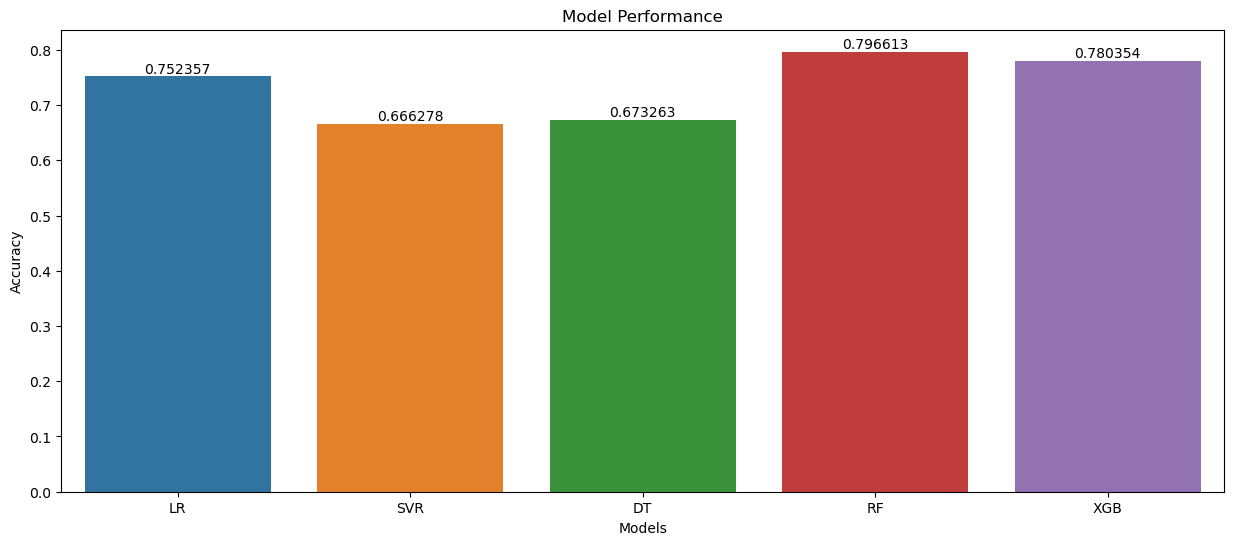

In [110]:
models = ['LR','SVR','DT','RF','XGB']
r = [lr_score, svr_score,dt_score,rf_score,xg_score]
plt.figure(figsize=(15,6))
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Accuracy')
ax = sns.barplot(x=models,y=r)
for label in ax.containers:
  ax.bar_label(label)

### Insights
- Random forest model accuracy is 79 % and it gives the best accuracy without hyperparameter.
- XG Boost model accuracy is 78 % and it gives the second best accuracy without hyperparameter.
- Linear Regression model accuracy is 75 % and it gives the second best accuracy without hyperparameter.

# Hyperparameter Tuning

In [111]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'n_estimators': [50, 65, 80, 100, 115, 130, 150],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
    'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]}

In [112]:
rcv = RandomizedSearchCV(estimator=xg_model, scoring='r2', param_distributions=param_dist,
                                       n_iter=300, cv=3, verbose=2, random_state=16, n_jobs=-1)

In [113]:
rcv.fit(x_train, y_train)##training data on randomsearch
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 0.2, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15, 'gamma': 0})


In [114]:
XGB2=XGBRegressor(reg_lambda= 51.2, reg_alpha= 0.2, n_estimators= 150, max_depth= 9, learning_rate= 0.15, gamma= 0)
XGB2.fit(x_train, y_train)
y_predict_XGB=XGB2.predict(x_test)

In [115]:
hp_xg = r2_score(y_test,y_predict_XGB)
hp_xg

0.7927487442196045

In [116]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

scv = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=300, cv=3,
                          scoring='r2', verbose=2, random_state=42, n_jobs=-1)

scv.fit(x_train, y_train)  # Training data on RandomizedSearchCV
cv_best_params = scv.best_params_  # It will give you the best parameters
print(f"Best parameters: {cv_best_params}")

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [117]:
RF2=RandomForestRegressor(n_estimators=100 , min_samples_split=5 ,min_samples_leaf = 1, max_features= 'sqrt', max_depth= None)
RF2.fit(x_train, y_train)
y_predict_RF=RF2.predict(x_test)

In [118]:
hp_rf = r2_score(y_test,y_predict_RF)
hp_rf

0.7653656348508958

In [119]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


model = Ridge()


# Perform grid search
param_grid = {
    'alpha': [0.01,0.1, 1, 10, 100,150],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [120]:
best_params

{'alpha': 10, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [121]:
LR2=Ridge(alpha=10,fit_intercept= True, solver='sparse_cg')
LR2.fit(x_train, y_train)
y_predict_LR=LR2.predict(x_test)

In [122]:
hp_lr = r2_score(y_test,y_predict_LR)
hp_lr

0.769117876624994

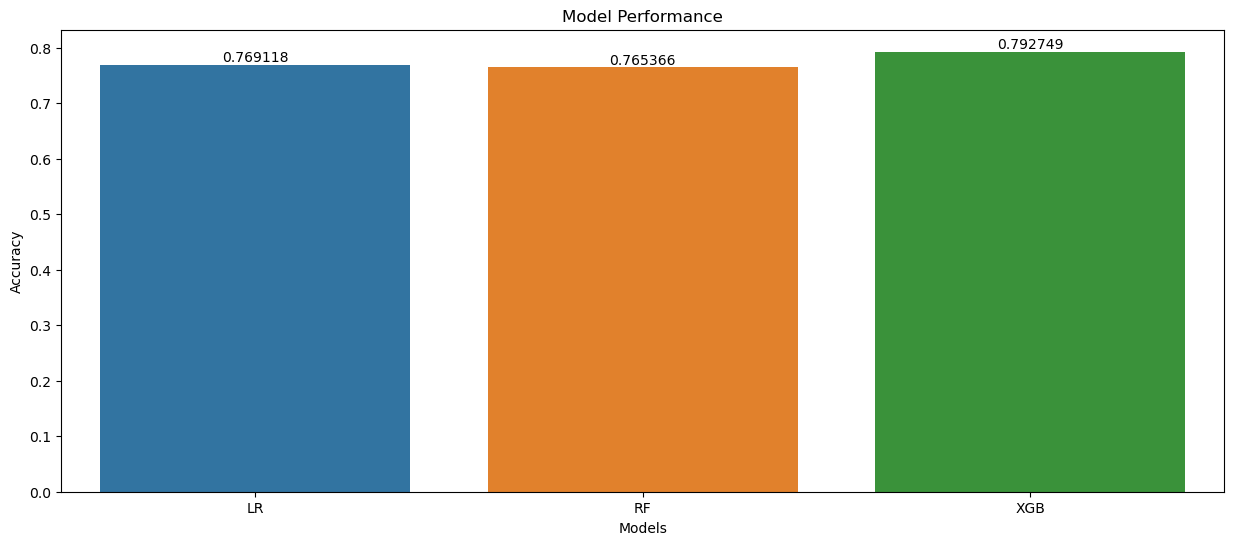

In [123]:
models = ['LR','RF','XGB']
r = [hp_lr,hp_rf,hp_xg]
plt.figure(figsize=(15,6))
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Accuracy')
ax = sns.barplot(x=models,y=r)
for label in ax.containers:
  ax.bar_label(label)

### Insights 
- After hyperparameter tuning , the r2 score of Random Forest is 79.5 % 
- After hyperparameter tuning , the r2 score of XG Boost is 79.2 %
- After hyperparameter tuning , the r2 score of Linear Regression is 76 % 

In [124]:
data.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Task 3: Suggestions to the Bank Marketing Team

### 1. Customer Segmentation

- Lot Size and Location Segmentation: Identify customer segments based on lot size and location preferences. For example, market larger lots to families looking for more outdoor space and emphasize proximity to amenities for smaller lots.

- Property Age Segmentation: Segment customers based on the age of the property. Differentiate marketing strategies for historic homes, newly built properties, and those undergoing recent renovations.

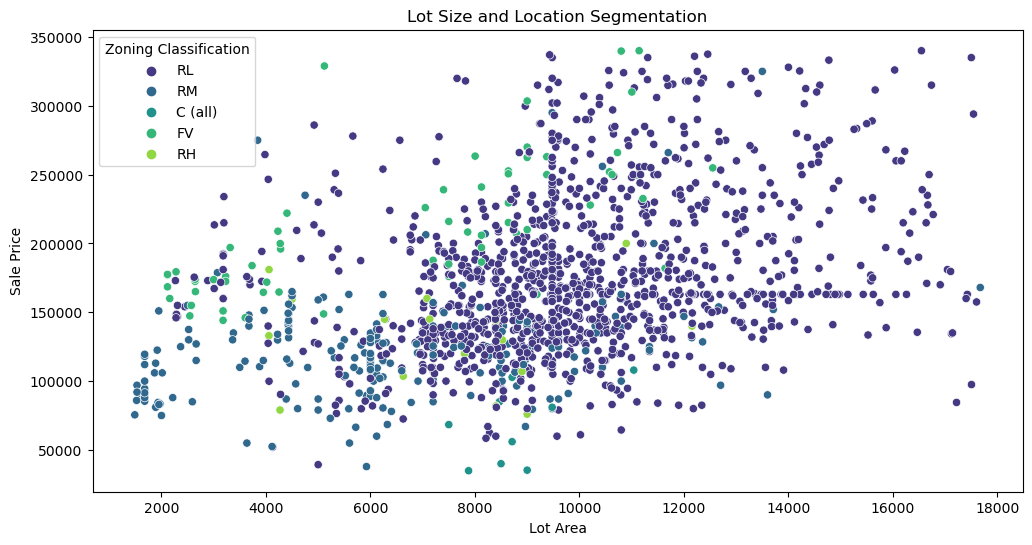

In [131]:
# Suggestion 1: Lot Size and Location Segmentation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='LotArea', y='SalePrice', hue='MSZoning', palette='viridis')
plt.title('Lot Size and Location Segmentation')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.legend(title='Zoning Classification')
plt.show()

### 2. Tailored Marketing Campaigns:

- Neighborhood-Specific Campaigns: Customize marketing campaigns to highlight properties in specific neighborhoods. Emphasize features such as safety, school quality, and nearby recreational areas based on neighborhood characteristics.

- Property Style Preferences: Tailor campaigns based on property style preferences (e.g., BldgType and HouseStyle). Highlight modern designs for contemporary preferences and traditional styles for those seeking classic architecture.

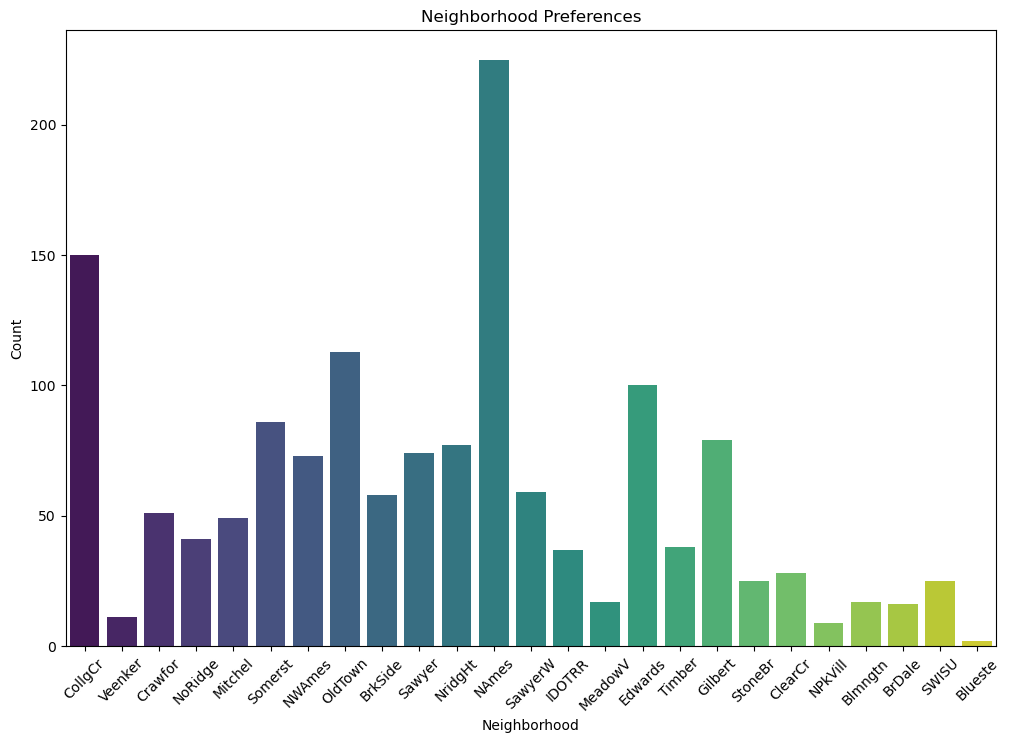

In [133]:
# Suggestion 2: Neighborhood-Specific Campaigns
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Neighborhood', palette='viridis')
plt.title('Neighborhood Preferences')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. Leverage Predictive Model Insights:

- Highlight Influential Features: Utilize insights from the predictive model to understand features influencing a customer's decision to buy. Prioritize marketing efforts on these influential factors, such as overall property quality (OverallQual), neighborhood desirability (Neighborhood), and age of the property (YearBuilt).

In [141]:
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
})

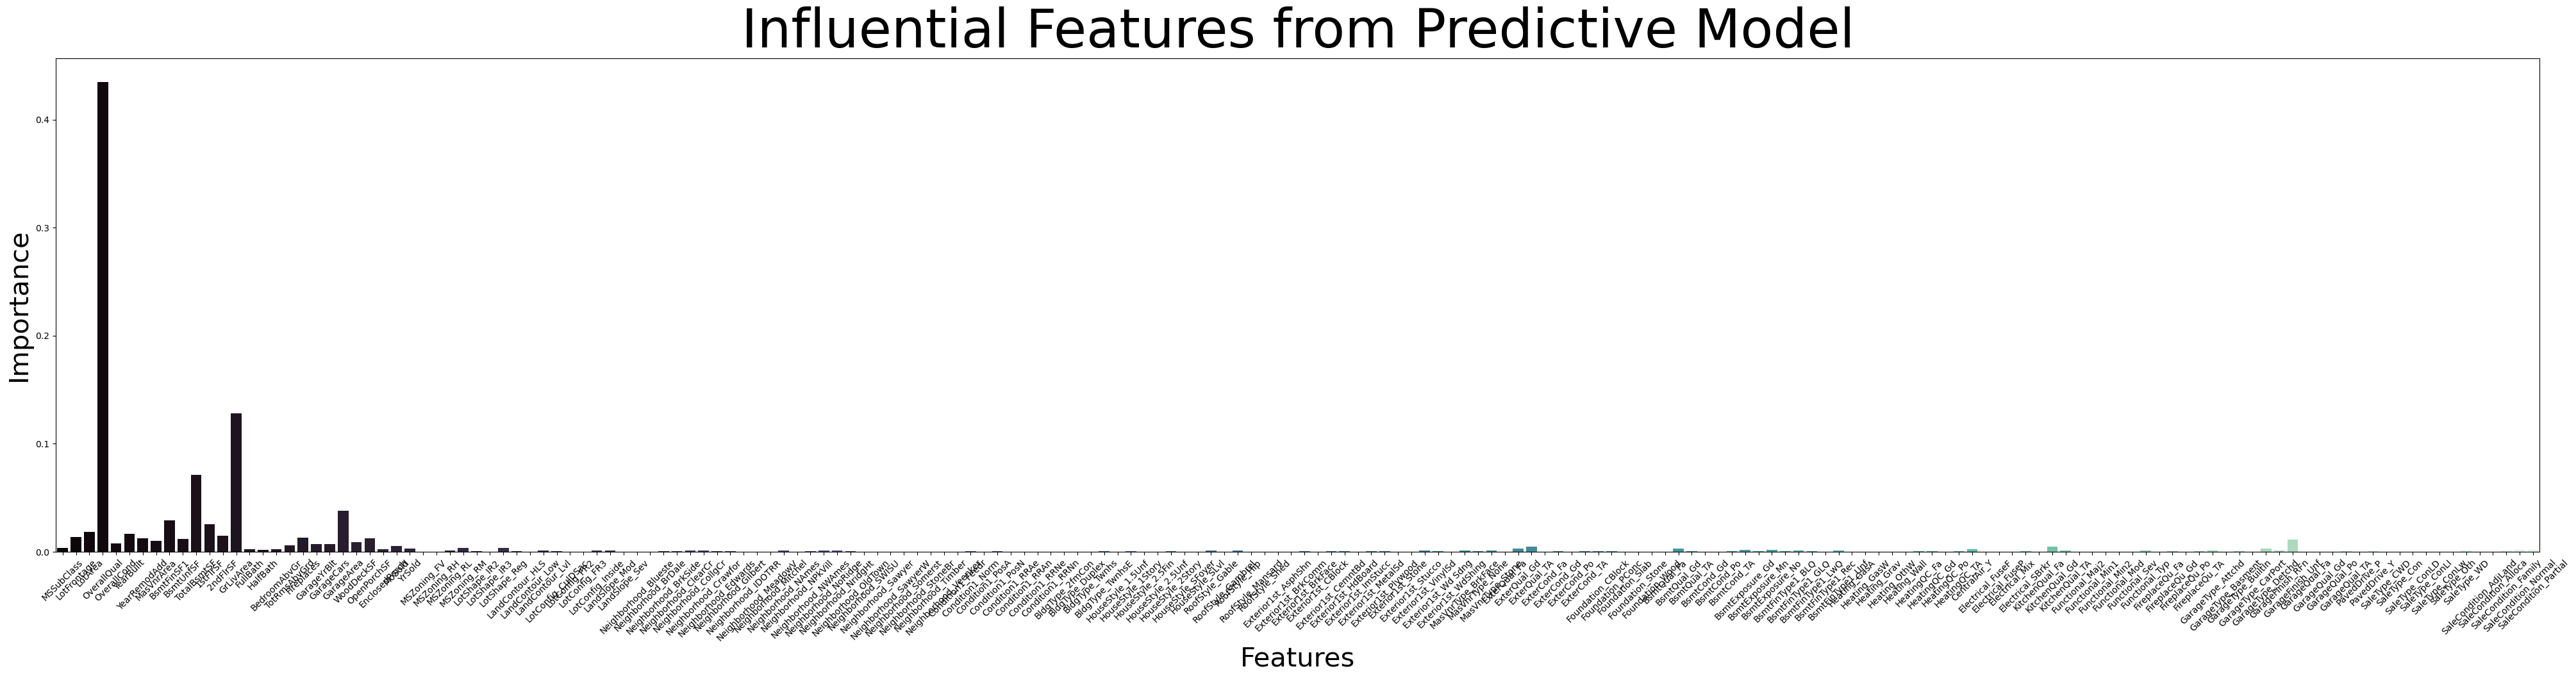

In [149]:
# Suggestion 3: Highlight Influential Features
# Assuming 'feature_importance_df' is a DataFrame with feature importances
plt.figure(figsize=(50, 10))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='mako')
plt.title('Influential Features from Predictive Model',fontsize=60)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Importance',fontsize=30)
plt.xticks(rotation=45)
plt.show()

### 4. Cross-Selling Opportunities:

- Home Improvement Loans: Identify opportunities for cross-selling home improvement loans based on features like the condition of the property (OverallCond) and potential renovation needs. Offer financing options for property upgrades.

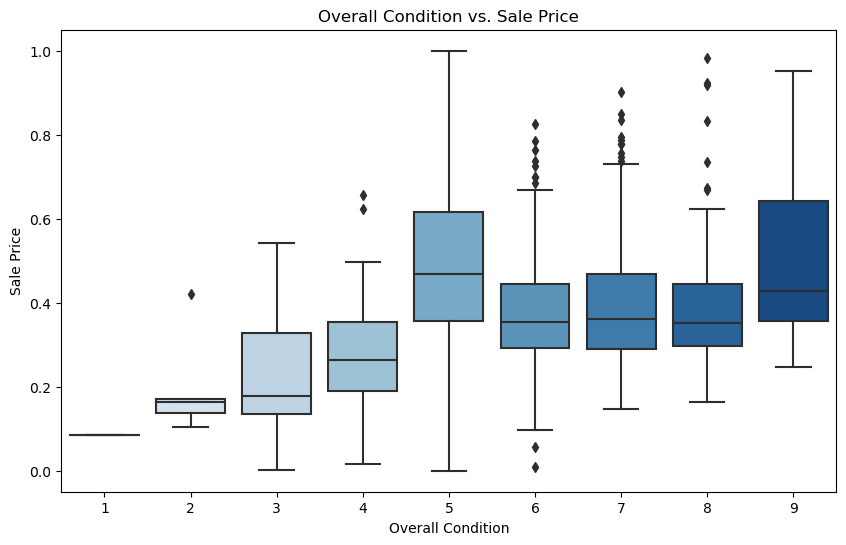

In [150]:
# Suggestion 4: Home Improvement Loans
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverallCond', y='SalePrice', palette='Blues')
plt.title('Overall Condition vs. Sale Price')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

### 5. Feedback Mechanism:

- Gather Customer Preferences: Implement a feedback mechanism to collect customer preferences on specific property features. Use this feedback to refine marketing strategies and align offerings with customer expectations.

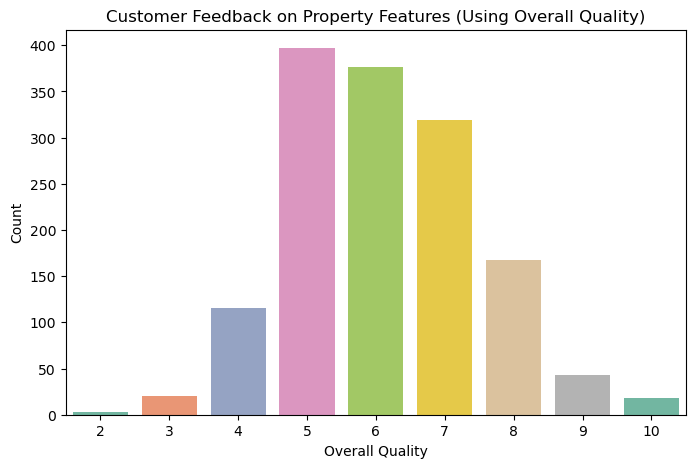

In [154]:
# Assuming 'OverallQual' represents an overall quality rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OverallQual', palette='Set2')
plt.title('Customer Feedback on Property Features (Using Overall Quality)')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()